
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sectionproperties.pre.library.steel_sections import mono_i_section
from sectionproperties.analysis.section import Section


<IPython.core.display.Javascript object>


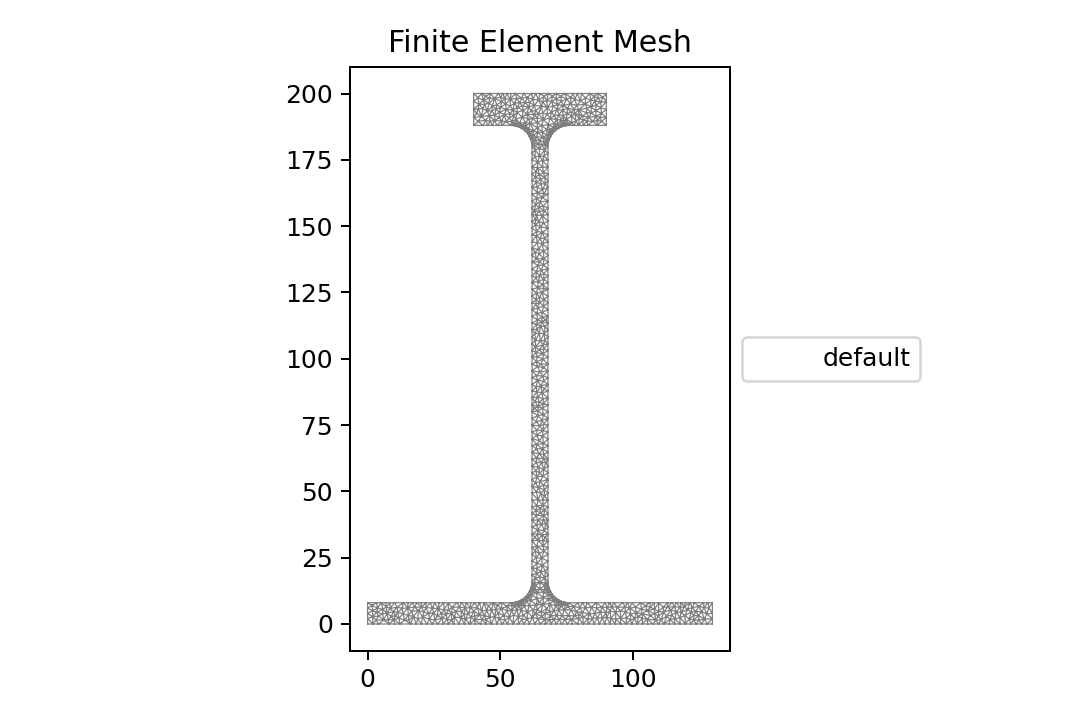

Mesh Statistics:
--3570 nodes
--1611 elements
--1 region



In [71]:
from sectionproperties.pre.library.steel_sections import mono_i_section

geometryAA = mono_i_section(
    d=200, b_t=50, b_b=130, t_ft=12, t_fb=8, t_w=6, r=8, n_r=16
)
geometryAA.create_mesh(mesh_sizes=[3.0])
sectionAA = Section(geometryAA)
sectionAA.plot_mesh()
#section = Section(geometry)
sectionAA.display_mesh_info()


In [20]:

sectionAA.calculate_geometric_properties()
sectionAA.display_results(fmt='.3f')

Section Properties:
A	 = 2775.305
Perim.	 = 734.243
Qx	 = 231819.924
Qy	 = 180394.848
cx	 = 65.000
cy	 = 83.530
Ixx_g	 = 36860873.836
Iyy_g	 = 13319969.332
Ixy_g	 = 15068295.083
Ixx_c	 = 17497066.781
Iyy_c	 = 1594304.226
Ixy_c	 = -0.000
Zxx+	 = 150227.481
Zxx-	 = 209471.654
Zyy+	 = 24527.757
Zyy-	 = 24527.757
rx	 = 79.401
ry	 = 23.968
phi	 = 0.000
I11_c	 = 17497066.781
I22_c	 = 1594304.226
Z11+	 = 150227.481
Z11-	 = 209471.654
Z22+	 = 24527.757
Z22-	 = 24527.757
r11	 = 79.401
r22	 = 23.968



In [57]:
geometryBB = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)
geometryBB.create_mesh(mesh_sizes=[3.0])

sectionBB = Section(geometryBB)

sectionBB = Section(geometryBB)
(area, ixx, iyy, ixy, j, phi) = sectionBB.calculate_frame_properties()


In [30]:
import sectionproperties.pre.library.primitive_sections as sections
import sectionproperties.pre.library.steel_sections as steel_sections
from sectionproperties.pre.geometry import CompoundGeometry
from sectionproperties.pre.pre import Material
from sectionproperties.analysis.section import Section

In [48]:
steel = Material(
    name="Steel",
    elastic_modulus=200e3,
    poissons_ratio=0.3,
    yield_strength=500,
    density=8.05e-6,
    color="grey",
)
concrete = Material(
    name="concrete",
    elastic_modulus=30e3,
    poissons_ratio=0.2,
    yield_strength=350,
    density=2.4e-6,
    color="burlywood",
)

In [49]:
I_beam = mono_i_section(
    d=1752.6, b_t=368.3, b_b=596.9, t_ft=38.1, t_fb=38.1, t_w=15.875, r=0, n_r=0
)

In [50]:
panel = sections.rectangular_section(d=190, b=1000, material=concrete)
panel = panel.align_center(I_beam).align_to(I_beam, on="top")
# Create intermediate nodes in panel to match nodes in ub
panel = (panel - I_beam) | panel

In [51]:
section_geometry = CompoundGeometry([I_beam, panel])

In [52]:
section_geometry.create_mesh(mesh_sizes=[5, 20])
comp_section = Section(section_geometry, time_info=True)
comp_section.display_mesh_info()  # display the mesh information

--Initialising the Section class...
----completed in 0.465748 seconds---

Mesh Statistics:
--72725 nodes
--35374 elements
--2 regions



<IPython.core.display.Javascript object>


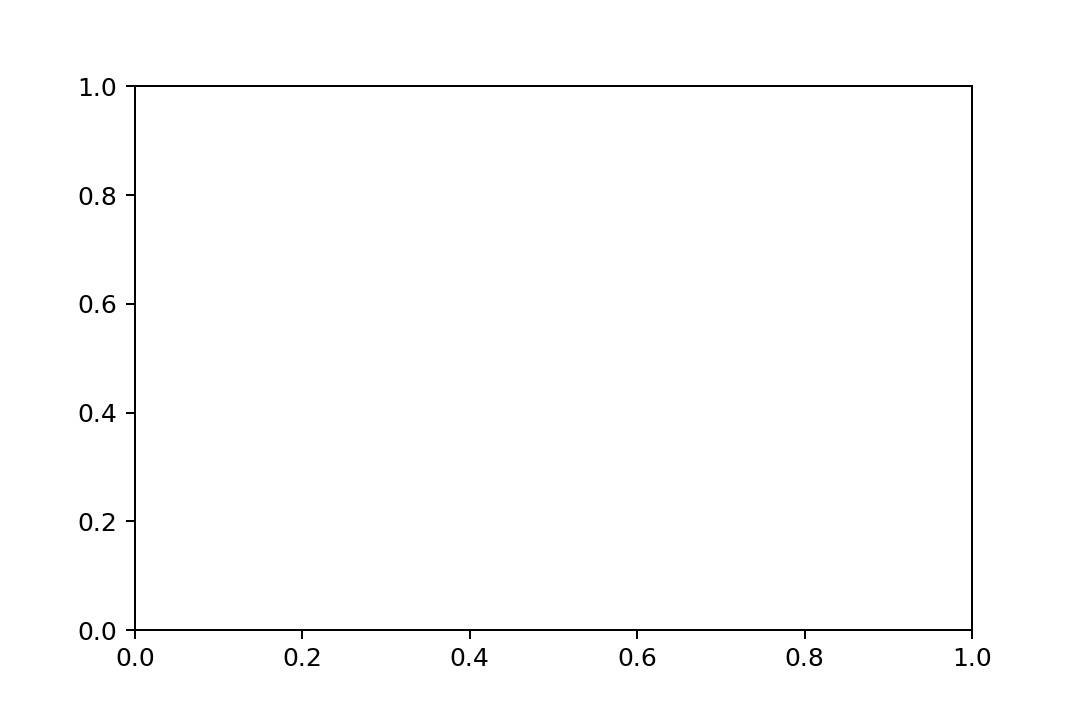

<IPython.core.display.Javascript object>


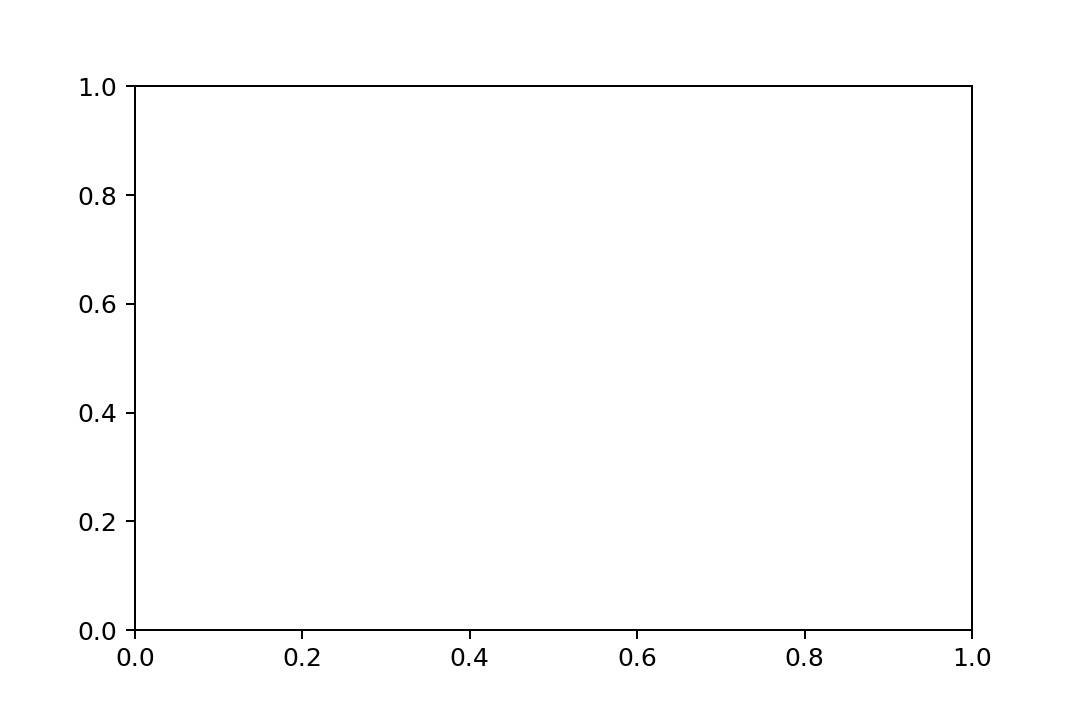

<IPython.core.display.Javascript object>


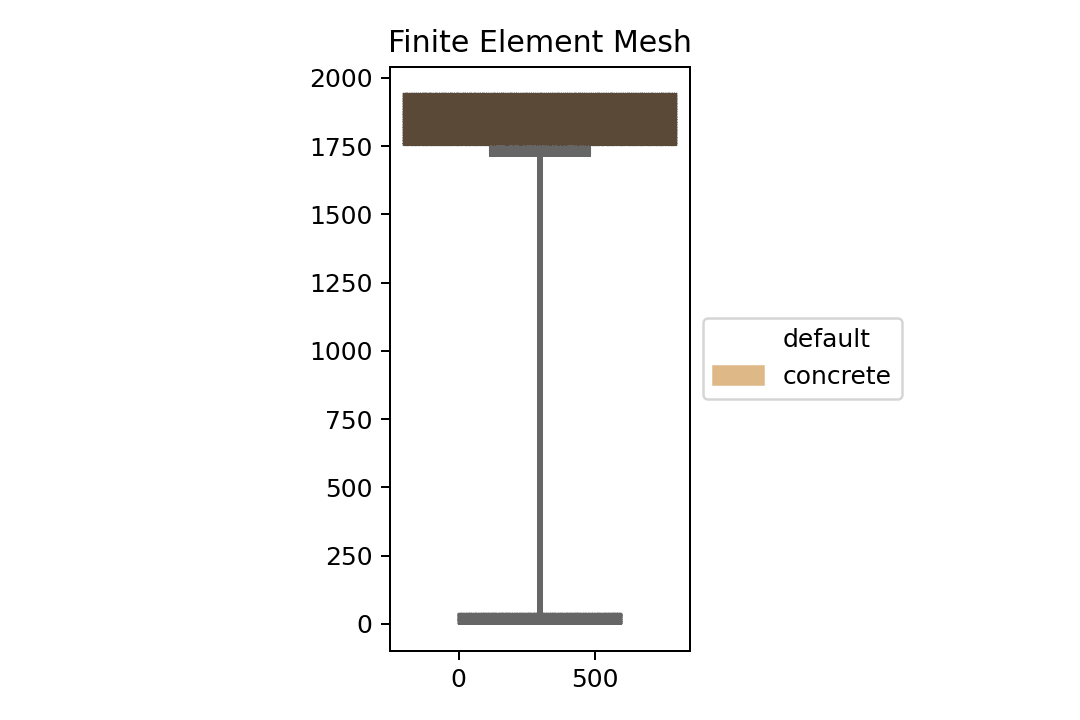

<AxesSubplot:title={'center':'Finite Element Mesh'}>

In [53]:
comp_section.plot_mesh(materials=True, alpha=0.6)

In [60]:
comp_section.calculate_geometric_properties()
comp_section.display_results()

--Calculating geometric section properties...
----completed in 97.592196 seconds---

Section Properties:
A	 = 2.533870e+05
Perim.	 = 7.047250e+03
Mass	 = 6.338743e+04
E.A	 = 5.700063e+09
E.Qx	 = 1.053137e+13
E.Qy	 = 1.701184e+12
cx	 = 2.984500e+02
cy	 = 1.847588e+03
E.Ixx_g	 = 1.947488e+16
E.Iyy_g	 = 9.827192e+14
E.Ixy_g	 = 3.143087e+15
E.Ixx_c	 = 1.725507e+13
E.Iyy_c	 = 4.750008e+14
E.Ixy_c	 = -1.500000e+00
E.Zxx+	 = 1.816091e+11
E.Zxx-	 = 9.339239e+09
E.Zyy+	 = 9.500017e+11
E.Zyy-	 = 9.500017e+11
rx	 = 5.501973e+01
ry	 = 2.886738e+02
phi	 = -9.000000e+01
E.I11_c	 = 4.750008e+14
E.I22_c	 = 1.725507e+13
E.Z11+	 = 9.500017e+11
E.Z11-	 = 9.500017e+11
E.Z22+	 = 9.339239e+09
E.Z22-	 = 1.816091e+11
r11	 = 2.886738e+02
r22	 = 5.501973e+01
E_eff	 = 2.249549e+04
G_eff	 = 9.373141e+03
nu_eff	 = 1.999973e-01
E.J	 = 6.037720e+13
E.Iw	 = 1.228488e+18
x_se	 = 2.984500e+02
y_se	 = 1.847597e+03
x_st	 = 2.984500e+02
y_st	 = 1.847597e+03
x1_se	 = -8.946170e-03
y2_se	 = 2.011795e-06
E.A_sx	 = 4.750002e+

No Model_ODB specified, trying to get data from the active model.
3D model


<IPython.core.display.Javascript object>


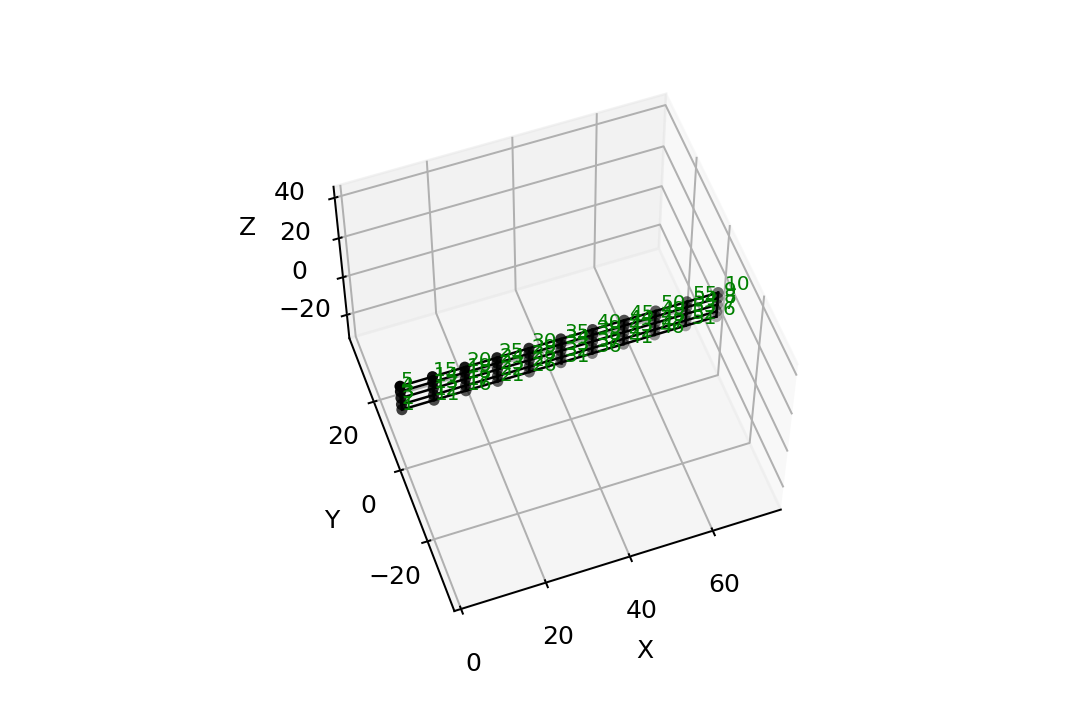

Lxyz: [0.   0.   2.81], L: 2.81
Lxyz: [0.   0.   3.44], L: 3.44
Lxyz: [0.   0.   3.44], L: 3.4399999999999995
Lxyz: [0.   0.   2.81], L: 2.8100000000000005
Lxyz: [0.   0.   2.81], L: 2.81
Lxyz: [0.   0.   3.44], L: 3.44
Lxyz: [0.   0.   3.44], L: 3.4399999999999995
Lxyz: [0.   0.   2.81], L: 2.8100000000000005
Lxyz: [0.   0.   2.81], L: 2.81
Lxyz: [0.   0.   3.44], L: 3.44
Lxyz: [0.   0.   3.44], L: 3.4399999999999995
Lxyz: [0.   0.   2.81], L: 2.8100000000000005
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [0.   0.   2.81], L: 2.81
Lxyz: [0.   0.   3.44], L: 3.44
Lxyz: [0.   0.   3.44], L: 3.4399999999999995
Lxyz: [0.   0.   2.81], L: 2.8100000000000005
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [7.5 0.  0. ], L: 7.5
Lxyz: [0.   0.   2.81], L: 2.81
Lxyz: [0.   0.   3.44], L: 3.44
Lxyz: [0.   0.   3.44], L: 3.439

<IPython.core.display.Javascript object>


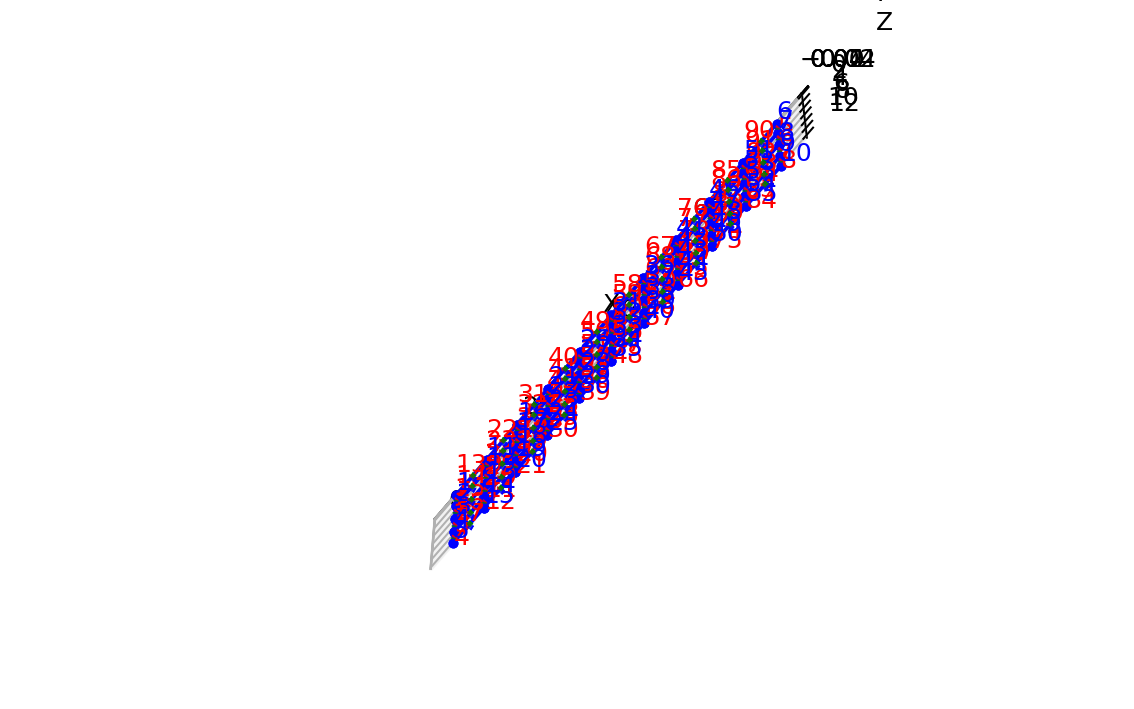

In [66]:
import numpy as np
import ospgrillage as og

# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# define material
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A= comp_section.get_area()*10**-6 * m2,
    J= comp_section.get_j()*10**-9 * m3,
    Iz=0.3694 * m4,
    Iy=0.113887e-3 * m4,
    Az=0.0371929 * m2,
    Ay=0.0371902 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=concrete)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

# parameters of bridge grillage
L = 75 * m  # span
w = 12.5 * m  # width
n_l = 5  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 2.81 * m  # distance between edge beam and first exterior beam
angle = 0  # skew angle

# create grillage
simple_grid = og.create_grillage(
    bridge_name="Banksia st",
    long_dim=L,
    width=w,
    skew=angle,
    num_long_grid=n_l,
    num_trans_grid=n_t,
    edge_beam_dist=edge_dist,
)

# assign grillage member to element groups of grillage model
simple_grid.set_member(longitudinal_beam, member="interior_main_beam")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_1")
simple_grid.set_member(longitudinal_beam, member="exterior_main_beam_2")
simple_grid.set_member(edge_longitudinal_beam, member="edge_beam")
simple_grid.set_member(transverse_slab, member="transverse_slab")
simple_grid.set_member(end_transverse_slab, member="start_edge")
simple_grid.set_member(end_transverse_slab, member="end_edge")

# create the model in OpenSees
simple_grid.create_osp_model(
    pyfile=False
)  # pyfile will not (False) be generated for further analysis (should be create_osp?)
og.opsplt.plot_model("nodes")  # plotting using Get_rendering
og.opsv.plot_model(az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

AttributeError: 'Section' object has no attribute 'A'